In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/daily-website-visitors.csv')


# New Section

In [ ]:
df.head(10)


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133
7,8,Sunday,1,9/21/2014,"2,288","1,656","1,481",175
8,9,Monday,2,9/22/2014,"3,638","2,586","2,312",274
9,10,Tuesday,3,9/23/2014,"4,462","3,257","2,989",268


In [ ]:
df.tail(10)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
2157,2158,Monday,2,8/10/2020,"3,638","2,745","2,325",420
2158,2159,Tuesday,3,8/11/2020,"3,740","2,742","2,258",484
2159,2160,Wednesday,4,8/12/2020,"3,767","2,904","2,477",427
2160,2161,Thursday,5,8/13/2020,"3,621","2,780","2,322",458
2161,2162,Friday,6,8/14/2020,"2,971","2,308","1,922",386
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499
2166,2167,Wednesday,4,8/19/2020,"2,064","1,564","1,297",267


In [ ]:
df.shape

(2167, 8)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row,2167.0,NaN,NaN,NaN,1084.0,625.703338,1.0,542.5,1084.0,1625.5,2167.0
Day,2167,7,Sunday,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day.Of.Week,2167.0,NaN,NaN,NaN,3.997231,2.000229,1.0,2.0,4.0,6.0,7.0
Date,2167,2167,9/14/2014,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page.Loads,2167,1756,"2,948",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unique.Visits,2167,1658,"2,780",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First.Time.Visits,2167,1587,"3,146",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Returning.Visits,2167,663,552,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
data_null = df.notnull().sum

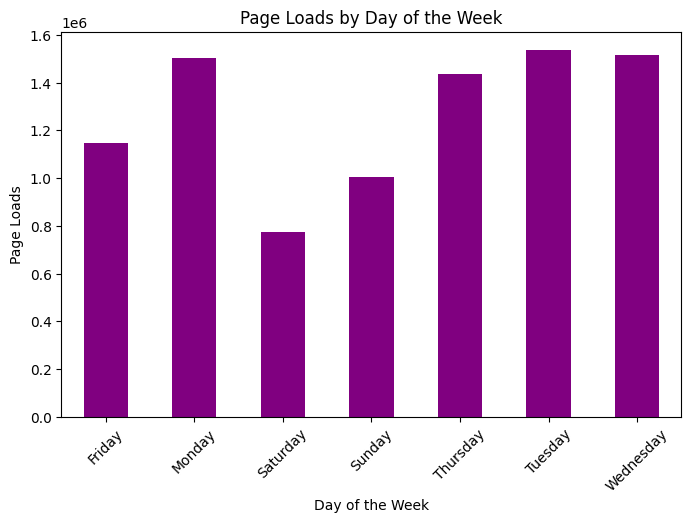

In [ ]:
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)



daywise_data = df.groupby('Day')['Page.Loads'].sum()


daywise_data.plot(kind='bar', figsize=(8, 5), color='purple')
plt.title('Page Loads by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Page Loads')
plt.xticks(rotation=45)

plt.show()

In [ ]:
data = df.drop_duplicates()


print(f"Dataset now has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset now has 2167 rows and 8 columns.


<Axes: >

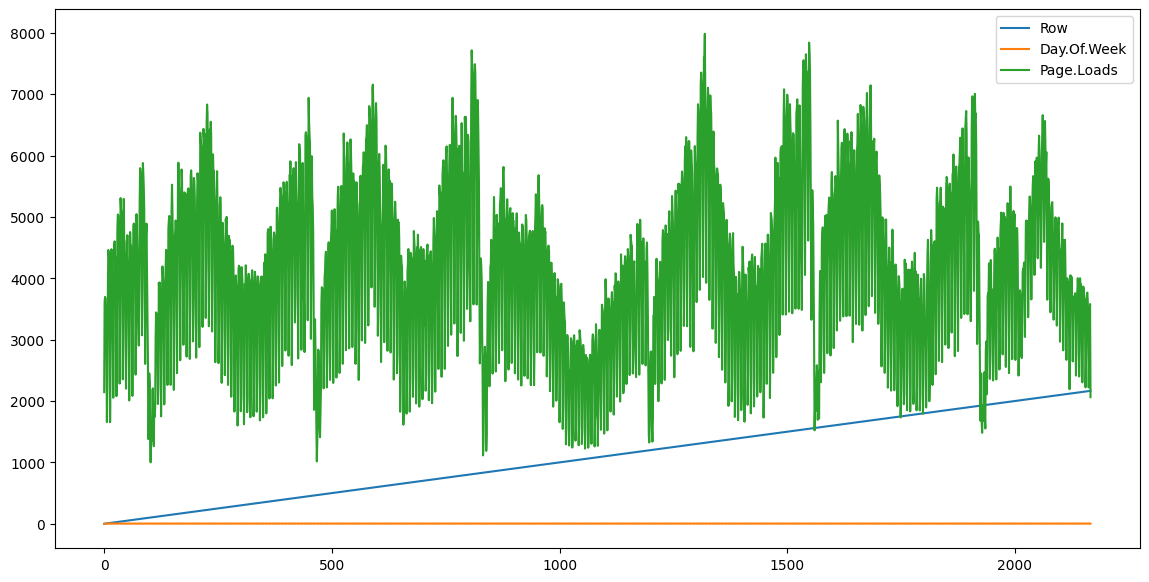

In [ ]:
df.plot(figsize=(14,7))

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2167, 8)

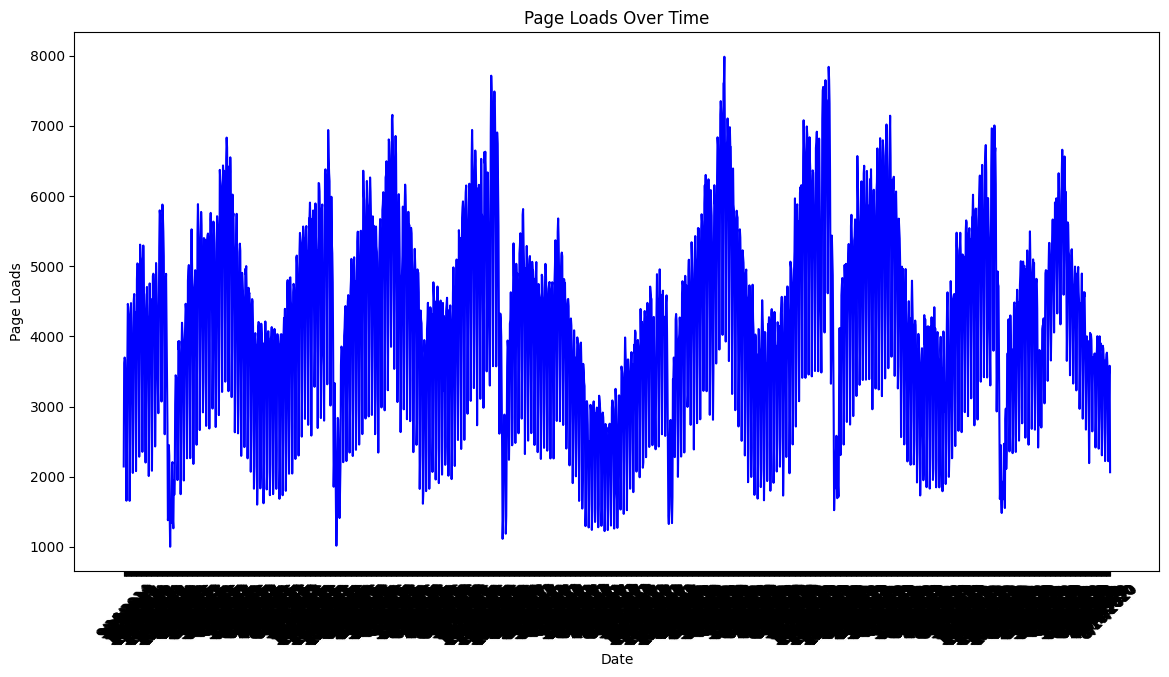

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Page.Loads'], color='blue')
plt.title('Page Loads Over Time')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.xticks(rotation=45)
plt.show()

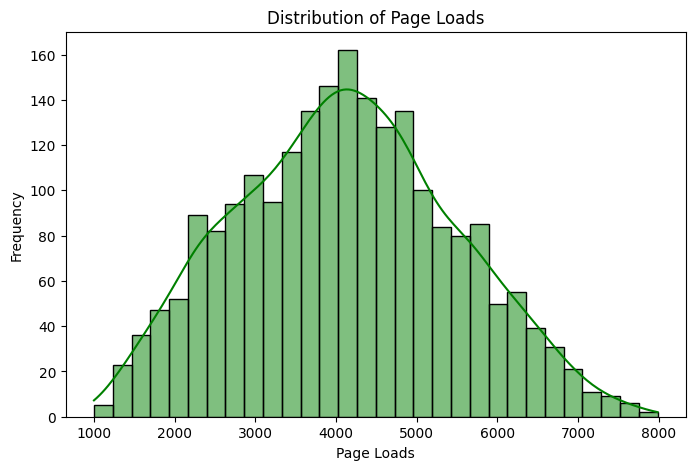

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Page.Loads'], bins=30, kde=True, color='green')
plt.title('Distribution of Page Loads')
plt.xlabel('Page Loads')
plt.ylabel('Frequency')
plt.show()

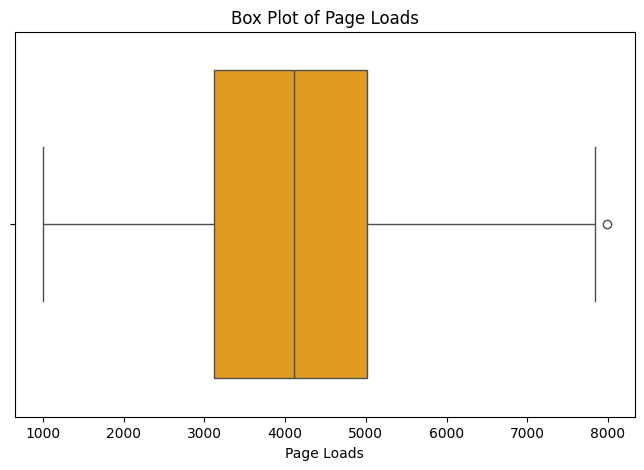

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Page.Loads'], color='orange')
plt.title('Box Plot of Page Loads')
plt.xlabel('Page Loads')
plt.show()

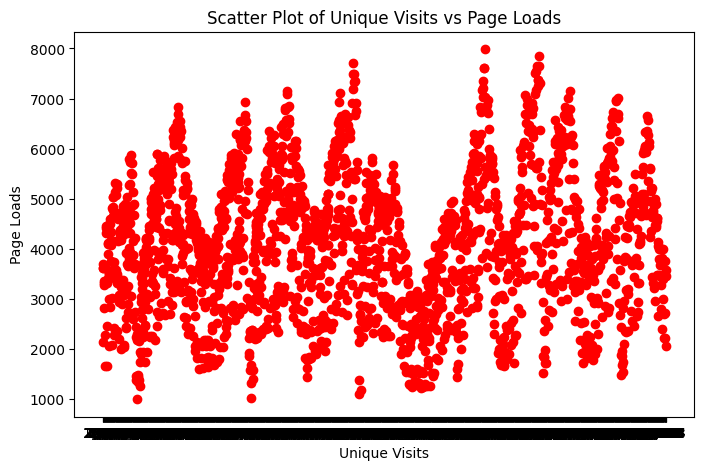

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Unique.Visits'], df['Page.Loads'], color='red')
plt.title('Scatter Plot of Unique Visits vs Page Loads')
plt.xlabel('Unique Visits')
plt.ylabel('Page Loads')
plt.show()

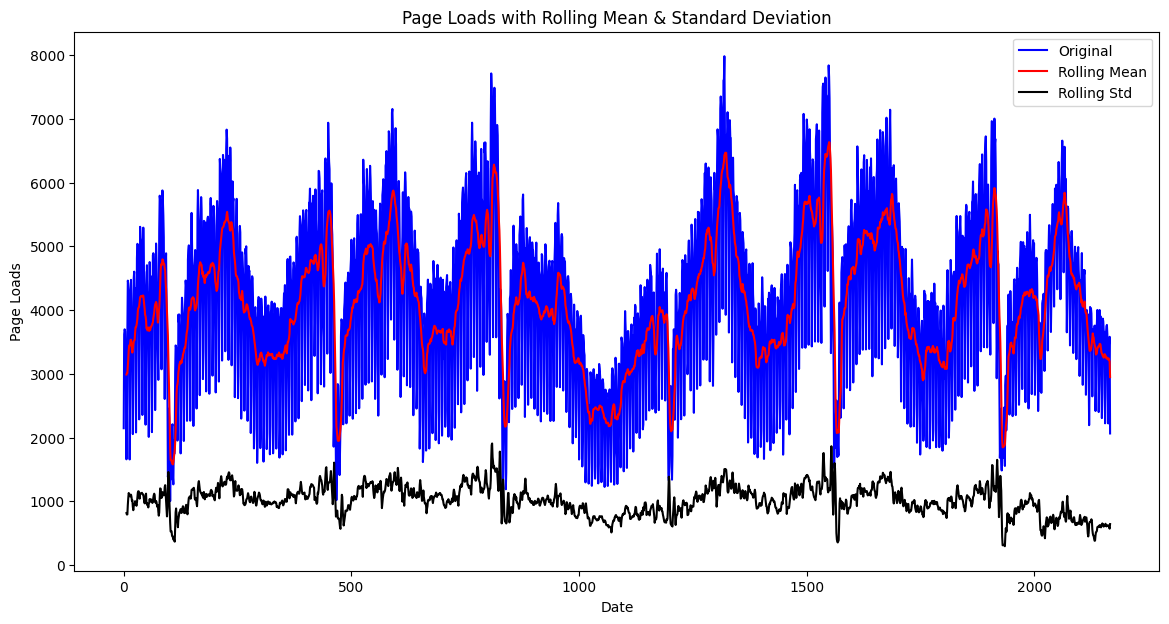

In [ ]:
rolling_mean = df['Page.Loads'].rolling(window=7).mean()
rolling_std = df['Page.Loads'].rolling(window=7).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Page.Loads'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Page Loads with Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()